# Results of complementation of Büchi automata

In [1]:
from ltlcross_wrapper import ResAnalyzer, gather_cumulative, gather_mins
import pandas as pd

In [2]:
from tools import tools, benchmark_names

### Visualization of the cumulative data over all benchmarks
For each benchmark, we list the cumulative numbers of states for each tool. The best value for each benchmark is highlighted by green background. The `yes` prefix in the tool names means that the Spot simplifications were applied on the results of the tools (were not disabled for seminator). By setting
```python
tools = None
```
you can display results also before the simplifications of Spot were applied, and, moreover, results for `autfilt` configured to produce _deterministic parity automata_ (`autfilt_DPA`) will be also available.

The tools are:
* `autfilt` : Spot's complementation that produces TGBA output
* `buechic` : Buechic from [ROLL](https://iscasmc.ios.ac.cn/roll/doku.php) library, based on automata learning techniques
* `goal#fri` : The Fribourg complementation plugin for GOAL
* `goal#pit` : The complementation of GOAL based on Piterman's determinization (variant of Safra's construction) and conversion to NBA.
* `ncsb` : Complementation in `seminator` that is a transition-based version of the [NCSB algorithm](https://www.fi.muni.cz/~xblahoud/publications/tacas2016preprint.pdf) for complementation of semi-deterministic automata. `#best` indicates, that the better of 2 outputs were chosen (the default behaviour of Seminator). In the extended results (with `tools=None`) we have the variants:
  - `#pldi` the new version of the algorithm implemented in Seminator, it is based on this [PLDI'18 paper](https://dl.acm.org/doi/10.1145/3192366.3192405).
  - `#spot` the algorithm as was already implemented in Spot
  
The benchmarks start with translation of either `random` formulas or formulas from `literature` by `ltl2tgba`. The suffix `_det` indicates that `ltl2tgba` created automata, that are already deterministic, `_sd` stands for semi-deterministic (but not deterministic), and `_nd` represent automata that are not even semi-deterministic.

In [3]:
names = benchmark_names
tools = ["yes.autfilt","yes.ncsb#best","yes.goal#fri","yes.goal#pit","yes.buechic"]

In [4]:
benchmarks = {}
for name in names:
    b = ResAnalyzer(f"data/{name}.csv", tool_set=tools, cols=["states","time","acc","transitions","edges"])
    b.name = name
    b.orig_count = len(b.values)
    b.clean_count = len(b.values.dropna())
    benchmarks[name] = b

In [5]:
gather_cumulative(benchmarks)

,literature_det,literature_sd,literature_nd,random_det,random_sd,random_nd
tool,,,,,,
yes.autfilt,611,190,197,2439,2892,5507
yes.buechic,1388,833,328,3632,5766,6343
yes.goal#fri,627,290,196,2493,3367,5359
yes.goal#pit,617,331,261,2454,3389,7615
yes.ncsb#best,622,210,195,2473,2828,5082


## Minimal automata
The following table shows for how many formulas each tool produces automaton that has the smallest number of states. The minimum ranges over the considered tools. The number in `min hits` shows how many times the same size as the smallest automaton was achieved. The number in `unique min hits` counts only cases where the given tool is the only tool with such a small automaton.

In [6]:
gather_mins(benchmarks)

### Time in seconds

In [7]:
gather_cumulative(benchmarks, col="time")

,literature_det,literature_sd,literature_nd,random_det,random_sd,random_nd
tool,,,,,,
yes.autfilt,6.69195,1.65173,10.106,17.2809,21.154,143.632
yes.buechic,1863.91,204.616,603.545,740.333,904.794,2348.93
yes.goal#fri,696.468,350.423,263.876,1537.18,1836.8,2495.74
yes.goal#pit,698.411,453.724,302.677,1568.25,2019.01,2969.07
yes.ncsb#best,7.32493,1.68781,2.03465,18.077,22.6863,321.401


## Closer look at benchmark by input automaton type

In [8]:
for t in ["nd", "sd", "det"]:
    bench = {n: b for n, b in benchmarks.items() if n[-3:].find(t) >= 0}
    display(t, gather_cumulative(bench, tools))
    for b in bench.values():
        display(b.cross_compare(tools, include_fails=True))
    print("\n\n\n")

'nd'

,literature_nd,random_nd
tool,,
yes.autfilt,197,5507
yes.buechic,328,6343
yes.goal#fri,196,5359
yes.goal#pit,261,7615
yes.ncsb#best,195,5082


,yes.autfilt,yes.ncsb#best,yes.goal#fri,yes.goal#pit,yes.buechic,V
yes.autfilt,nan,7,5,11,18,41
yes.ncsb#best,12,nan,6,15,18,51
yes.goal#fri,12,9,nan,15,19,55
yes.goal#pit,6,2,1,nan,16,25
yes.buechic,2,2,1,4,nan,9


,yes.autfilt,yes.ncsb#best,yes.goal#fri,yes.goal#pit,yes.buechic,V
yes.autfilt,nan,214,220,347,373,1154
yes.ncsb#best,242,nan,240,361,400,1243
yes.goal#fri,233,230,nan,361,387,1211
yes.goal#pit,108,100,94,nan,286,588
yes.buechic,126,98,113,213,nan,550


'sd'

,literature_sd,random_sd
tool,,
yes.autfilt,190,2892
yes.buechic,833,5766
yes.goal#fri,290,3367
yes.goal#pit,331,3389
yes.ncsb#best,210,2828


,yes.autfilt,yes.ncsb#best,yes.goal#fri,yes.goal#pit,yes.buechic,V
yes.autfilt,nan,11,22,18,46,97
yes.ncsb#best,15,nan,24,12,46,97
yes.goal#fri,12,2,nan,10,44,68
yes.goal#pit,9,0,16,nan,41,66
yes.buechic,3,3,4,8,nan,18


,yes.autfilt,yes.ncsb#best,yes.goal#fri,yes.goal#pit,yes.buechic,V
yes.autfilt,nan,108,237,210,483,1038
yes.ncsb#best,142,nan,246,215,486,1089
yes.goal#fri,109,91,nan,140,473,813
yes.goal#pit,72,56,161,nan,451,740
yes.buechic,13,14,24,48,nan,99


'det'

,literature_det,random_det
tool,,
yes.autfilt,611,2439
yes.buechic,1388,3632
yes.goal#fri,627,2493
yes.goal#pit,617,2454
yes.ncsb#best,622,2473


,yes.autfilt,yes.ncsb#best,yes.goal#fri,yes.goal#pit,yes.buechic,V
yes.autfilt,nan,14,15,12,152,193
yes.ncsb#best,14,nan,8,4,148,174
yes.goal#fri,15,13,nan,5,150,183
yes.goal#pit,15,11,6,nan,150,182
yes.buechic,0,4,2,2,nan,8


,yes.autfilt,yes.ncsb#best,yes.goal#fri,yes.goal#pit,yes.buechic,V
yes.autfilt,nan,64,45,46,494,649
yes.ncsb#best,9,nan,30,16,489,544
yes.goal#fri,20,57,nan,36,491,604
yes.goal#pit,11,48,21,nan,491,571
yes.buechic,0,5,3,3,nan,11


In [9]:
b = benchmarks["random_nd"]

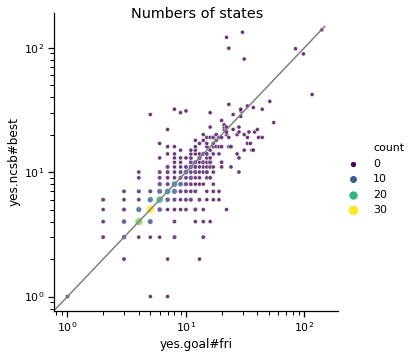

In [10]:
b.seaborn_scatter_plot("yes.goal#fri","yes.ncsb#best",log=True)

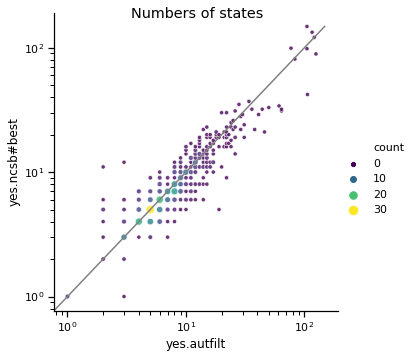

In [11]:
b.seaborn_scatter_plot("yes.autfilt","yes.ncsb#best",log=True)

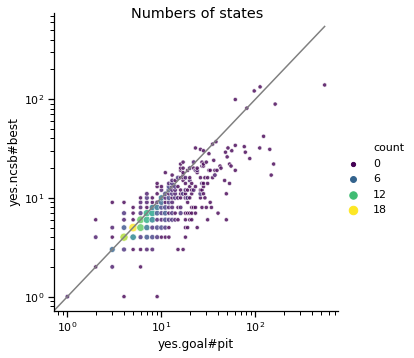

In [12]:
p = b.seaborn_scatter_plot("yes.goal#pit","yes.ncsb#best", log=True)

## Without simplifications of Spot
GOAL#pit runs removing dead and unreachable states, Buechic probably does not create such states. The rest of the tools does not remove them.

We can observe that Fribourg generates large ammount of unnecessary states before simplifications.

In [13]:
no_tools = [t.replace("yes","no") for t in tools]

In [14]:
gather_cumulative(benchmarks, tool_set=no_tools)

,literature_det,literature_sd,literature_nd,random_det,random_sd,random_nd
tool,,,,,,
no.autfilt,613,257,234,2442,3578,7623
no.buechic,1635,915,332,4704,6903,7639
no.goal#fri,1260,2518,3031,5054,17376,55089
no.goal#pit,772,1033,1113,2918,8500,20803
no.ncsb#best,804,439,654,3060,6446,20778


## Minimal automata
The following table shows for how many formulas each tool produces automaton that has the smallest number of states. The minimum ranges over the considered tools. The number in `min hits` shows how many times the same size as the smallest automaton was achieved. The number in `unique min hits` counts only cases where the given tool is the only tool with such a small automaton.

In [15]:
gather_mins(benchmarks, tool_set=no_tools)

### Time in seconds

In [16]:
gather_cumulative(benchmarks, col="time", tool_set=no_tools)

,literature_det,literature_sd,literature_nd,random_det,random_sd,random_nd
tool,,,,,,
no.autfilt,5.75997,1.5631,0.506391,17.5037,20.1102,20.9111
no.buechic,923.437,201.406,573.621,746.382,906.391,2373.79
no.goal#fri,717.746,363.339,245.052,1565.11,1833.91,2477.29
no.goal#pit,679.127,450.502,324.876,1544.54,2002.34,2849.87
no.ncsb#best,5.9429,1.6059,1.4125,17.6571,21.4792,26.2529


In [17]:
for t in ["nd", "sd", "det"]:
    bench = {n: b for n, b in benchmarks.items() if n[-3:].find(t) >= 0}
    display(t, gather_cumulative(bench, no_tools))
    for b in bench.values():
        display(b.cross_compare(no_tools))
    print("\n\n\n")

'nd'

,literature_nd,random_nd
tool,,
yes.autfilt,197,5507
yes.buechic,328,6343
yes.goal#fri,196,5359
yes.goal#pit,261,7615
yes.ncsb#best,195,5082


,no.autfilt,no.ncsb#best,no.goal#fri,no.goal#pit,no.buechic,V
no.autfilt,nan,19,20,18,17,74
no.ncsb#best,1,nan,17,8,5,31
no.goal#fri,0,3,nan,0,4,7
no.goal#pit,2,12,19,nan,7,40
no.buechic,3,15,16,13,nan,47


,no.autfilt,no.ncsb#best,no.goal#fri,no.goal#pit,no.buechic,V
no.autfilt,nan,443,500,450,363,1756
no.ncsb#best,56,nan,475,328,211,1070
no.goal#fri,0,25,nan,2,25,52
no.goal#pit,44,163,496,nan,166,869
no.buechic,136,289,475,333,nan,1233


'sd'

,literature_sd,random_sd
tool,,
yes.autfilt,190,2892
yes.buechic,833,5766
yes.goal#fri,290,3367
yes.goal#pit,331,3389
yes.ncsb#best,210,2828


,no.autfilt,no.ncsb#best,no.goal#fri,no.goal#pit,no.buechic,V
no.autfilt,nan,28,49,48,45,170
no.ncsb#best,8,nan,49,38,42,137
no.goal#fri,0,0,nan,1,25,26
no.goal#pit,0,3,47,nan,35,85
no.buechic,4,7,23,13,nan,47


,no.autfilt,no.ncsb#best,no.goal#fri,no.goal#pit,no.buechic,V
no.autfilt,nan,372,500,446,471,1789
no.ncsb#best,50,nan,500,295,369,1214
no.goal#fri,0,0,nan,0,107,107
no.goal#pit,27,107,500,nan,314,948
no.buechic,28,131,391,177,nan,727


'det'

,literature_det,random_det
tool,,
yes.autfilt,611,2439
yes.buechic,1388,3632
yes.goal#fri,627,2493
yes.goal#pit,617,2454
yes.ncsb#best,622,2473


,no.autfilt,no.ncsb#best,no.goal#fri,no.goal#pit,no.buechic,V
no.autfilt,nan,141,152,113,152,558
no.ncsb#best,0,nan,150,55,144,349
no.goal#fri,0,0,nan,0,90,90
no.goal#pit,0,77,152,nan,150,379
no.buechic,0,7,61,2,nan,70


,no.autfilt,no.ncsb#best,no.goal#fri,no.goal#pit,no.buechic,V
no.autfilt,nan,449,500,433,500,1882
no.ncsb#best,0,nan,490,72,477,1039
no.goal#fri,0,8,nan,6,207,221
no.goal#pit,0,142,492,nan,497,1131
no.buechic,0,22,288,3,nan,313


## Errors
We can observe several timeouts (120s) and 2 parsing errors on GOAL configurations. These occur on 2 formulas equivalent to false. GOAL does not see the automata as Büchi.

In [18]:
for name, b in benchmarks.items():
    display(name, b.get_error_counts())

'literature_det'

,timeout,parse error,incorrect,crash,no output
no.buechic,4,0,0,0,0
yes.buechic,4,0,0,0,0


'literature_sd'

,timeout,parse error,incorrect,crash,no output
no.buechic,1,0,0,0,0
no.goal#fri,1,0,0,0,0
no.goal#pit,2,0,0,0,0
yes.buechic,1,0,0,0,0
yes.goal#fri,1,0,0,0,0
yes.goal#pit,1,0,0,0,0


'literature_nd'

,timeout,parse error,incorrect,crash,no output
no.buechic,2,0,0,1,0
no.goal#fri,1,0,0,0,0
no.goal#pit,1,0,0,0,0
yes.buechic,2,0,0,0,0
yes.goal#fri,1,0,0,0,0
yes.goal#pit,1,0,0,0,0


'random_det'

,timeout,parse error,incorrect,crash,no output
no.goal#fri,0,2,0,0,0
no.goal#pit,0,2,0,0,0
yes.goal#fri,0,0,0,2,0
yes.goal#pit,0,0,0,2,0


'random_sd'

,timeout,parse error,incorrect,crash,no output
tool,,,,,


'random_nd'

,timeout,parse error,incorrect,crash,no output
no.buechic,3,0,0,0,0
no.goal#fri,2,0,0,0,0
no.goal#pit,4,0,0,0,0
yes.autfilt,1,0,0,0,0
yes.buechic,3,0,0,0,0
yes.goal#fri,3,0,0,0,0
yes.goal#pit,5,0,0,0,0
yes.ncsb#best,1,0,0,0,0
yes.ncsb#pldi,1,0,0,0,0
yes.ncsb#spot,1,0,0,0,0
